In [2]:
install.packages("rpart")       # performing regression trees
install.packages("rpart.plot")  # plotting regression trees
library(rpart)
library(rpart.plot)
library(tree)


Warning message:
"package 'rpart' is in use and will not be installed"Warning message:
"package 'rpart.plot' is in use and will not be installed"

# Exercise 2 (Simulation Study):

The goal here is to think about how a regression tree makes its predictions and consequently when a regression
tree might yield a better result than other methods.
- Propose a dgp that will be well suited for analysis using regression trees and evaluate relevant properties
  in a small simulation study.
- Propose a dgp that will be well suited for analysis using the linear regression model (i.e. where the linear
  regression model is more likely to “beat" the regression tree method) and evaluate.
- Show how pruning reduces the variance of the regression tree prediction.

## Trees Versus Linear Models
Regression and classification trees have a very different flavor from the more classical approaches for regression and classification methods already discussed before. Which model is better? It depends on the problem at hand. If the relationship between the features and the response is well approximated by a linear model, then an approach such as linear regression will likely work well, and will outperform a method such as a regression tree that does not exploit this linear structure. If instead there is a highly non-linear and complex relationship between the features and the response, then decision trees may outperform classical approaches.

In [32]:
# We would propose a data generating process where y is dependent by 3 or 4 covariates, which many not be 
# a linear combination of these cavariates.

# Data generating process

dgp1 <- function(n){
  X1 <- rnorm(n, m, sd)
  X2 <- rnorm(n, m, sd)
  X3 <- rnorm(n, m, sd)
  X4 <- rnorm(n, m, sd)  
  eps <- rnorm(n, 0 ,1)
  yi <-  X1 * X2 + X3 + ((X4)^2) + eps
  data <- data.frame("yi" = yi, "X1" = X1, "X2" = X2,"X3" = X3, "X4" = X4, "eps" = eps)
  return(data)
}

node), split, n, deviance, yval
      * denotes terminal node

  1) root 80 6119.00  4.2000  
    2) X4 < -3.22912 6  293.80 20.0100 *
    3) X4 > -3.22912 74 4203.00  2.9180  
      6) X4 < 2.82318 69 2271.00  1.7620  
       12) eps < 0.174865 36  773.00 -0.4868  
         24) X2 < 2.3619 31  495.60  0.2927  
           48) X1 < 2.00681 26  233.70  1.3680 *
           49) X1 > 2.00681 5   75.33 -5.3010 *
         25) X2 > 2.3619 5  141.80 -5.3190 *
       13) eps > 0.174865 33 1118.00  4.2150  
         26) X3 < 0.689315 17  527.90  1.6780  
           52) eps < 0.832155 7  167.80  5.2560 *
           53) eps > 0.832155 10  207.80 -0.8264 *
         27) X3 > 0.689315 16  364.10  6.9100  
           54) X2 < 0.805152 10  207.20  5.2650  
            108) X1 < 0.0784851 5  107.10  7.9050 *
            109) X1 > 0.0784851 5   30.45  2.6260 *
           55) X2 > 0.805152 6   84.73  9.6510 *
      7) X4 > 2.82318 5  566.00 18.8800 *


Call:
lm(formula = yi ~ ., data = training_data)

Coefficients:
(Intercept)           X1           X2           X3           X4          eps  
    3.78216      0.01498      0.17368      1.03986     -0.39858      1.15636  


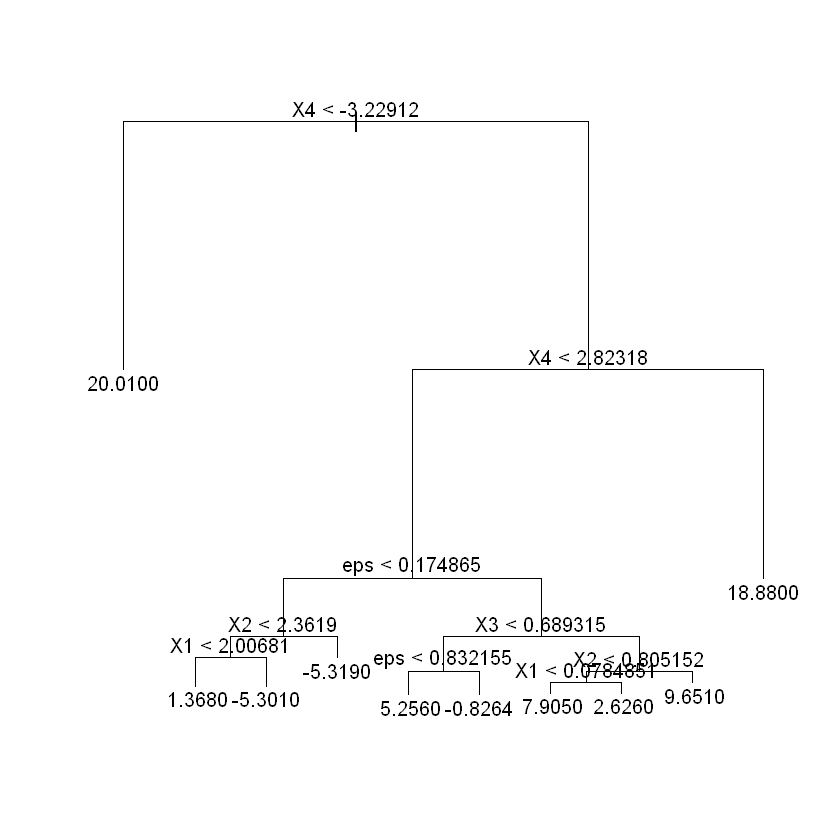

In [33]:
# Fitting a regression tree

n <- 100
m <- 0
sd <- 2

set.seed(122)

data <- dgp1(n)

train = sample(1:nrow(data), nrow(data)*0.8)
test = - train

training_data = data[train,]
test_data = data[test,]

train_tree <- tree(yi~., training_data)
train_tree
plot(train_tree)
text(train_tree, pretty=0)


# Fitting the linear model

train_lm <- lm(yi~., data = training_data)
train_lm





In [34]:
# Predicting the new data with the test data partion

test_tree <- predict(train_tree, newdata = test_data)
test_lm <- predict(train_lm, newdata = test_data)

#============calculating mse======================#
mse_tree <- mean((test_tree - test_data$yi) ^ 2)
mse_lm <- mean((test_lm - test_data$yi) ^ 2)
mse_tree
mse_lm

[1] 33.36905

[1] 39.24607

[1] "size"   "dev"    "k"      "method"

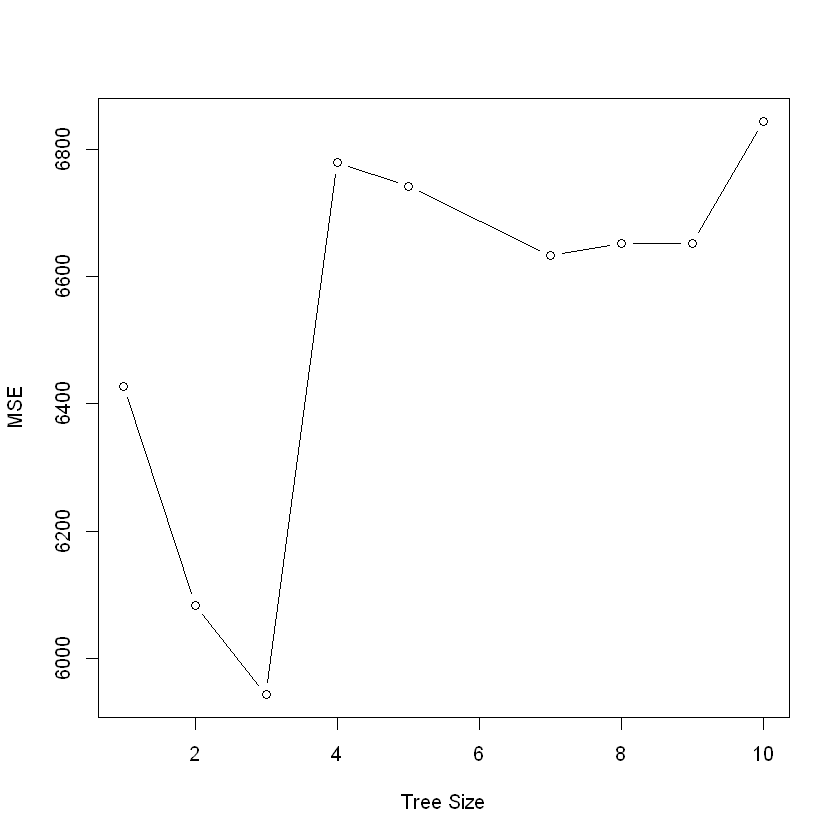

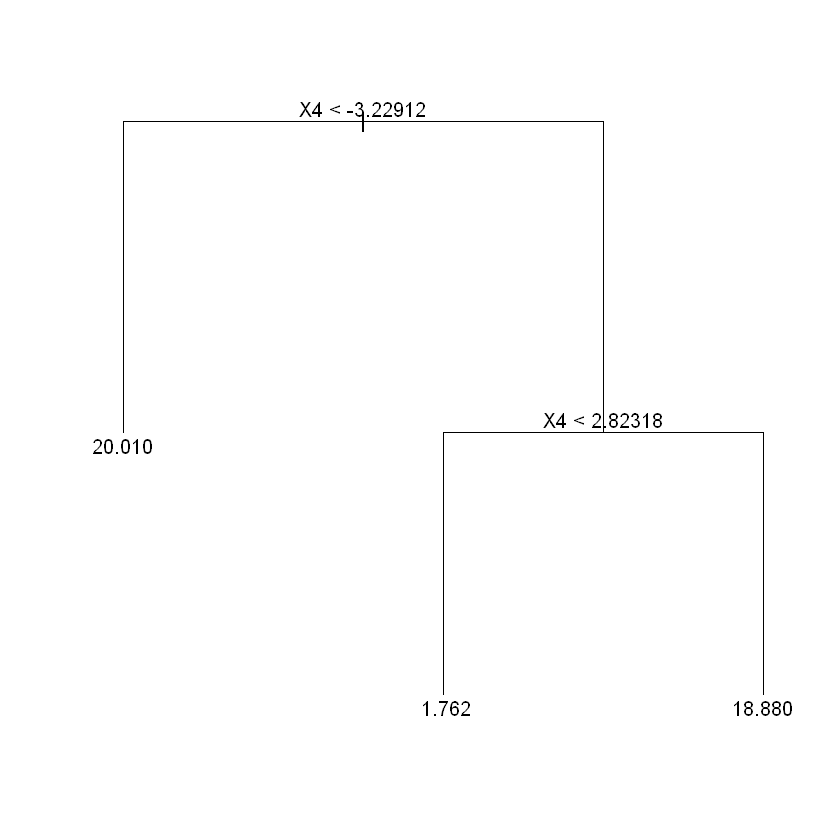

In [35]:
# Pruning the tree using cross validation 

cv_tree <- cv.tree(train_tree)
names(cv_tree)
plot(cv_tree$size,
     cv_tree$dev,
     type = "b",
     xlab = "Tree Size",
     ylab = "MSE")

# Prune the tree to size 3

pruned_tree <- prune.tree(train_tree, best = 3)

plot(pruned_tree)
text(pruned_tree, pretty=0)

In [36]:
# checking the accuracy of the pruned model using the testing data

test_ptree <- predict(pruned_tree, test_data)

#============calculating mse======================#
mse_ptree <- mean((test_ptree - test_data$yi) ^ 2)
mse_ptree

[1] 28.84159